# Домашнее задание "Линейная алгебра. Векторы"

Даны вектора x=(1,1), y=(2, 0) и z = (0,2)  
Надо:

In [4]:
import numpy as np
x = np.array([1,1])
y = np.array([2,0])
z = np.array([0,2])

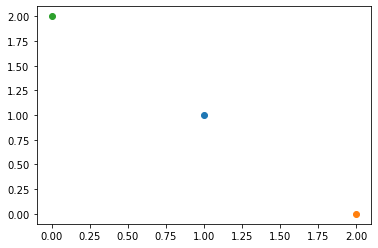

In [15]:
# Изобразить вектора на экране
import matplotlib.pyplot as plt
plt.plot(x[0], x[1], 'o')
plt.plot(y[0], y[1], 'o')
plt.plot(z[0], z[1], 'o')
plt.show()

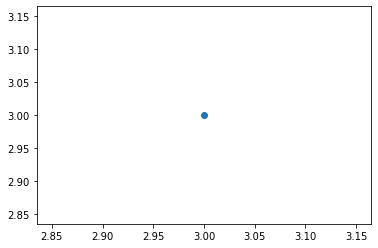

In [16]:
# Изобразить точку x + y + z
a = x+y+z
plt.plot(a[0], a[1], 'o')
plt.show()

In [19]:
# Найти угол между векторами x и y
def angle(x, y):
    """
    Подсчет угла между векторами x, y по их координатам
    """
    
    # длины векторов
    xLength = np.linalg.norm(x)
    yLength = np.linalg.norm(y)
    
    cosine = np.dot(x, y) / (xLength * yLength)
    angle = np.rad2deg(np.arccos(cosine))
    return angle

angle(x,y)

45.00000000000001

## Уровень 2

Даны дома из Бостона  
Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv)  
Написать код разложения дома по указанному базису  

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.drop('MEDV', axis=1, inplace = True)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [2]:
data.shape

(506, 13)

In [100]:
import sympy 
def coord(data, X):
    """
    Функция создаёт базис из первых N линейно независимых строк датасета data и вычисляет координаты в нём строки датасета с индексом X
    """
    # ищем базис
    mat = np.array(data)
    noneed, inds = sympy.Matrix(mat).T.rref()
    basis = []
    for i in inds:
        basis.append(list(mat[i]))
    # создаём систему уравнений и решаем ее
    A = np.array(basis).transpose()
    B = mat[3]
    return np.linalg.solve(A, B)     


In [101]:
coord(data,20)

array([-4.69935672e-17, -1.70694612e-02,  1.70694612e-02,  9.99346897e-01,
       -1.45114488e-02,  1.51645521e-02, -9.69295072e-03, -8.34087323e-03,
        9.73420825e-03, -2.25255838e-02,  7.31018228e-03,  2.35150172e-02,
        0.00000000e+00])